In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/world-happiness-report.csv')

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
df['Country name'].value_counts()

Philippines    15
Ukraine        15
France         15
Italy          15
Colombia       15
               ..
Guyana          1
Oman            1
Cuba            1
Suriname        1
Maldives        1
Name: Country name, Length: 166, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [7]:
df.shape

(1949, 11)

In [8]:
col = df.isnull().sum()
col

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [9]:
def handle_missing_values(col):
  val = df[col].mean()
  df[col] = df[col].fillna(val)

In [10]:
for i in col.index:
  if col[i]>0:
    handle_missing_values(i)

In [11]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [12]:
asia = df[(df['Country name'] == 'Nepal')|(df['Country name'] == 'India')|(df['Country name'] == 'Sri Lanka')|(df['Country name'] == 'Laos')|
               (df['Country name'] == 'Malaysia')|(df['Country name'] == 'Japan')|(df['Country name'] == 'Indonesia')|(df['Country name'] == 'Thailand')|
               (df['Country name'] == 'China')|(df['Country name'] == 'Singapore')|(df['Country name'] == 'Philippines')|(df['Country name'] == 'South Korea')|
               (df['Country name'] == 'Mongolia')|(df['Country name'] == 'Myanmar')|(df['Country name'] == 'Vietnam')|(df['Country name'] == 'Pakisthan')|
               (df['Country name'] == 'Maldives')|(df['Country name'] == 'Cambodia')|(df['Country name'] == 'Bangladesh')|(df['Country name'] == 'Taiwan Province of China')|
               (df['Country name'] == 'Hong Kong S.A.R of China')|(df['Country name'] == 'Afghanistan')]

In [13]:
asia.reset_index(drop=True,inplace=True)
asia = asia.rename({'Country name':'Asian Countries'},axis=1)
asia

,Asian Countries,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451000,50.80,0.718000,0.168000,0.882000,0.518000,0.258000
1,Afghanistan,2009,4.402,7.540,0.552000,51.20,0.679000,0.190000,0.850000,0.584000,0.237000
2,Afghanistan,2010,4.758,7.647,0.539000,51.60,0.600000,0.121000,0.707000,0.618000,0.275000
3,Afghanistan,2011,3.832,7.620,0.521000,51.92,0.496000,0.162000,0.731000,0.611000,0.267000
4,Afghanistan,2012,3.783,7.705,0.521000,52.24,0.531000,0.236000,0.776000,0.710000,0.268000
...,...,...,...,...,...,...,...,...,...,...,...
252,Vietnam,2015,5.076,8.770,0.849000,67.30,0.742558,0.086000,0.747125,0.642000,0.232000
253,Vietnam,2016,5.062,8.820,0.876000,67.50,0.894000,-0.090000,0.799000,0.536000,0.223000
254,Vietnam,2017,5.175,8.876,0.812552,67.70,0.742558,0.000103,0.747125,0.710003,0.268544
255,Vietnam,2018,5.296,8.934,0.832000,67.90,0.909000,-0.041000,0.808000,0.692000,0.191000


In [14]:
asia.shape

(257, 11)

In [15]:
asia.insert(2,'Regional indicator',' ')
sa = ['India','Nepal','Maldives','Bangladesh','Pakisthan','Sri Lanka','Afghanistan']
for i in asia['Asian Countries']:
    for j in sa:
        if i == j:
            asia.loc[asia['Asian Countries'] == i,"Regional indicator"] = 'South Asia'

ea = ['Taiwan Province of China','Japan','South Korea','Mongolia','Hong Kong S.A.R. of China','China']
for i in asia['Asian Countries']:
    for j in ea:
        if i == j:
            asia.loc[asia['Asian Countries'] == i,"Regional indicator"] = 'East Asia'

sea = ['Singapore','Thailand','Philippines','Vietnam','Malaysia','Indonesia','Laos','Cambodia','Myanmar']
for i in asia['Asian Countries']:
    for j in sea:
        if i == j:
            asia.loc[asia['Asian Countries'] == i,"Regional indicator"] = 'Southeast Asia'

In [16]:
asia

,Asian Countries,year,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,South Asia,3.724,7.370,0.451000,50.80,0.718000,0.168000,0.882000,0.518000,0.258000
1,Afghanistan,2009,South Asia,4.402,7.540,0.552000,51.20,0.679000,0.190000,0.850000,0.584000,0.237000
2,Afghanistan,2010,South Asia,4.758,7.647,0.539000,51.60,0.600000,0.121000,0.707000,0.618000,0.275000
3,Afghanistan,2011,South Asia,3.832,7.620,0.521000,51.92,0.496000,0.162000,0.731000,0.611000,0.267000
4,Afghanistan,2012,South Asia,3.783,7.705,0.521000,52.24,0.531000,0.236000,0.776000,0.710000,0.268000
...,...,...,...,...,...,...,...,...,...,...,...,...
252,Vietnam,2015,Southeast Asia,5.076,8.770,0.849000,67.30,0.742558,0.086000,0.747125,0.642000,0.232000
253,Vietnam,2016,Southeast Asia,5.062,8.820,0.876000,67.50,0.894000,-0.090000,0.799000,0.536000,0.223000
254,Vietnam,2017,Southeast Asia,5.175,8.876,0.812552,67.70,0.742558,0.000103,0.747125,0.710003,0.268544
255,Vietnam,2018,Southeast Asia,5.296,8.934,0.832000,67.90,0.909000,-0.041000,0.808000,0.692000,0.191000


In [17]:
asia.shape

(257, 12)

In [18]:
asia.isnull().sum()

Asian Countries                     0
year                                0
Regional indicator                  0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [19]:
asia['Regional indicator'].value_counts()

Southeast Asia    116
East Asia          71
South Asia         70
Name: Regional indicator, dtype: int64

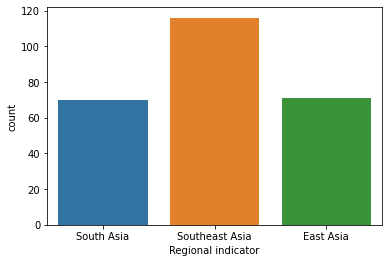

In [20]:
sns.countplot(x='Regional indicator',data=asia)

In [21]:
ls = asia.groupby('Regional indicator')['Life Ladder'].mean()
gdp = asia.groupby('Regional indicator')['Log GDP per capita'].mean()
ss = asia.groupby('Regional indicator')['Social support'].mean()
he = asia.groupby('Regional indicator')['Healthy life expectancy at birth'].mean()
corr = asia.groupby('Regional indicator')['Perceptions of corruption'].mean()
gen = asia.groupby('Regional indicator')['Generosity'].mean()
free = asia.groupby('Regional indicator')['Freedom to make life choices'].mean()
pos = asia.groupby('Regional indicator')['Positive affect'].mean()
neg = asia.groupby('Regional indicator')['Negative affect'].mean()

In [22]:
frame = {'Ladder score':ls,'Logged GDP per capita':gdp,'Social support':ss,
            'Healthy life expectancy':he,'Perceptions of corruption':corr,'Generosity':gen,'Freedom to make life choices':free,
        'Positive affect':pos,'Negative affect':neg}

In [23]:
Mean_df = pd.DataFrame(data=frame)


In [24]:
Mean_df

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption,Generosity,Freedom to make life choices,Positive affect,Negative affect
Regional indicator,,,,,,,,,
East Asia,5.662324,10.007047,0.852183,68.404137,0.784111,-0.052426,0.733659,0.747127,0.176239
South Asia,4.405886,8.299671,0.671600,60.118571,0.814688,0.069674,0.717643,0.662500,0.277065
Southeast Asia,5.341181,9.205379,0.809065,63.764828,0.736111,0.204656,0.856012,0.792491,0.253682


In [25]:
south_asia = asia[asia['Regional indicator'] == 'South Asia']
south_asia.reset_index(drop=True,inplace=True)
south_asia = south_asia.rename({'Asian Countries':'South Asian Countries'},axis=1)

east_asia = asia[asia['Regional indicator'] == 'East Asia']
east_asia.reset_index(drop=True,inplace=True)
east_asia = east_asia.rename({'Asian Countries':'East Asian Countries'},axis=1)

south_east_asia = asia[asia['Regional indicator'] == 'Southeast Asia']
south_east_asia.reset_index(drop=True,inplace=True)
south_east_asia = south_east_asia.rename({'Asian Countries':'South-East Asian Countries'},axis=1)

In [26]:
south_asia.sample(2)

,South Asian Countries,year,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
4,Afghanistan,2012,South Asia,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710000,0.268
20,Bangladesh,2014,South Asia,4.636,8.164,0.577,62.38,0.736,-0.098,0.789,0.710003,0.231


In [28]:
east_asia.sample(2)

,East Asian Countries,year,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
58,Taiwan Province of China,2006,East Asia,6.189,10.613,0.882,68.68,0.630,-0.030,0.846,0.814,0.094
44,South Korea,2007,East Asia,5.767,10.361,0.827,70.50,0.656,-0.059,0.803,0.690,0.226


In [27]:
south_east_asia.sample(2)

,South-East Asian Countries,year,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
37,Laos,2020,Southeast Asia,5.284,8.960,0.660,59.5,0.915,0.141,0.748,0.822,0.358
115,Vietnam,2019,Southeast Asia,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186


**SOUTH ASIAN COUNTRIES**

Life Ladder

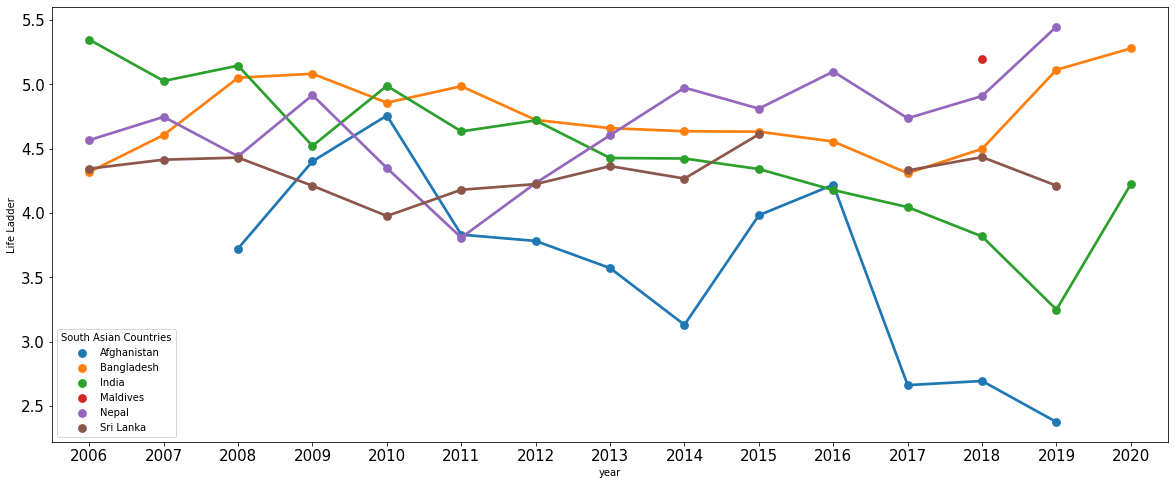

In [29]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Life Ladder',hue='South Asian Countries',data=south_asia)

 Log GDP per capita



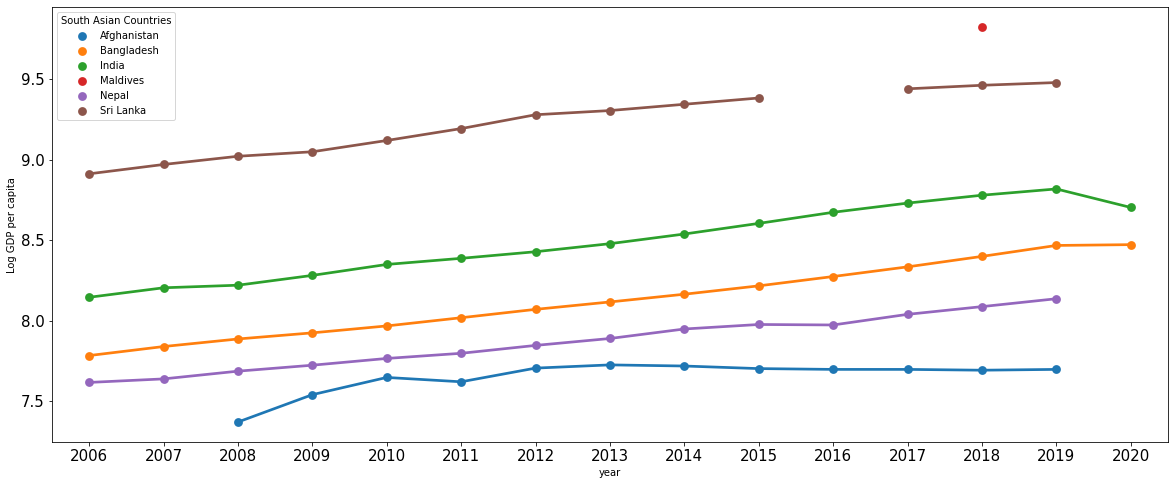

In [30]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Log GDP per capita',hue='South Asian Countries',data=south_asia)

Health Life Expectancy

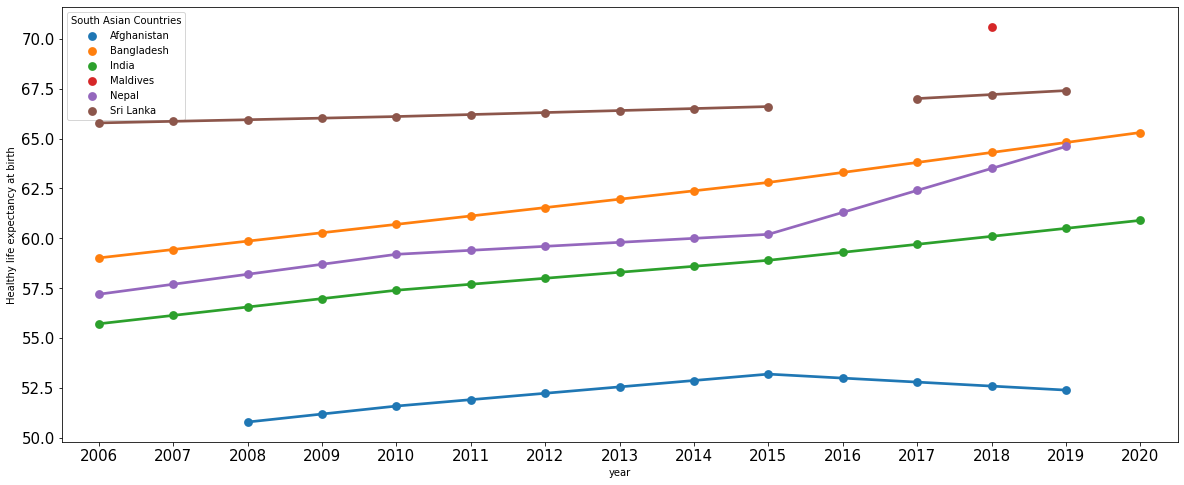

In [31]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Healthy life expectancy at birth',hue='South Asian Countries',data=south_asia)

Freedom to make life choices

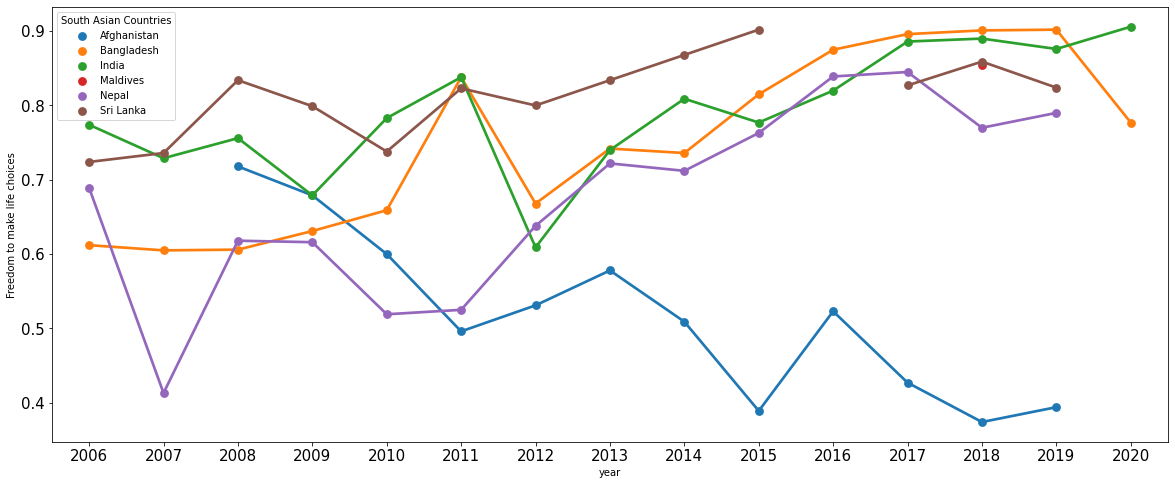

In [32]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Freedom to make life choices',hue='South Asian Countries',data=south_asia)

 Social support

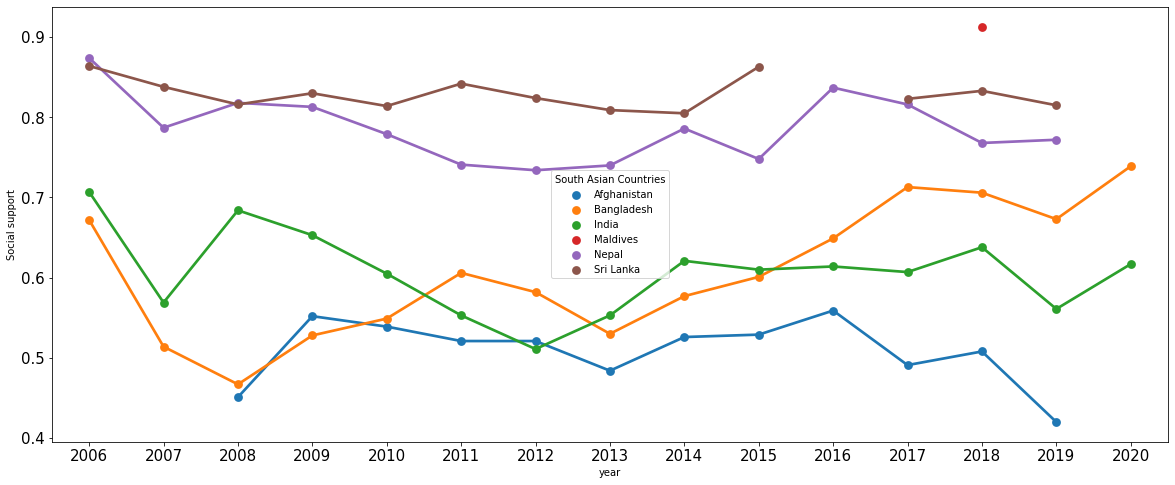

In [33]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Social support',hue='South Asian Countries',data=south_asia)

Perceptions of corruption

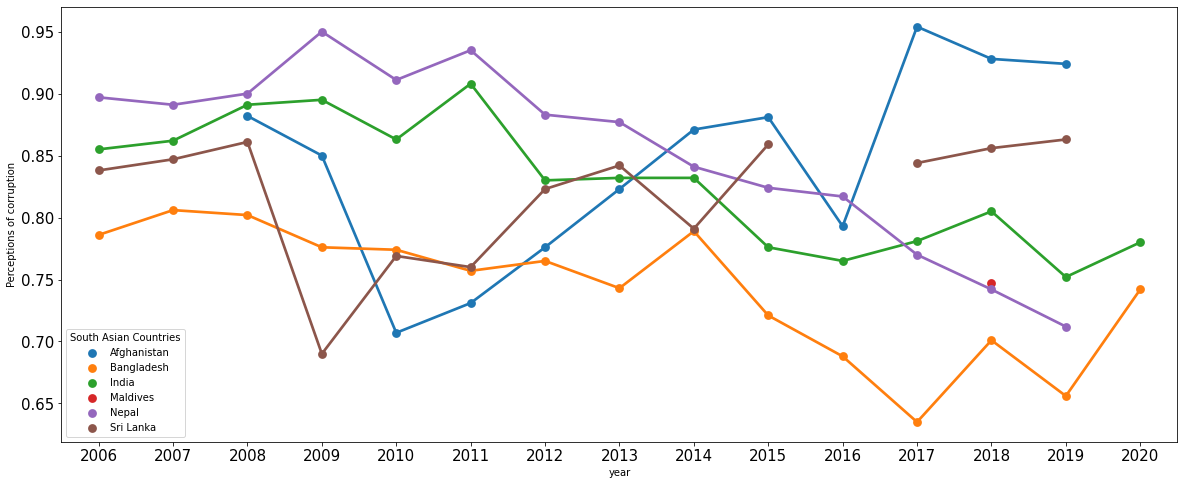

In [34]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Perceptions of corruption',hue='South Asian Countries',data=south_asia)

Generosity

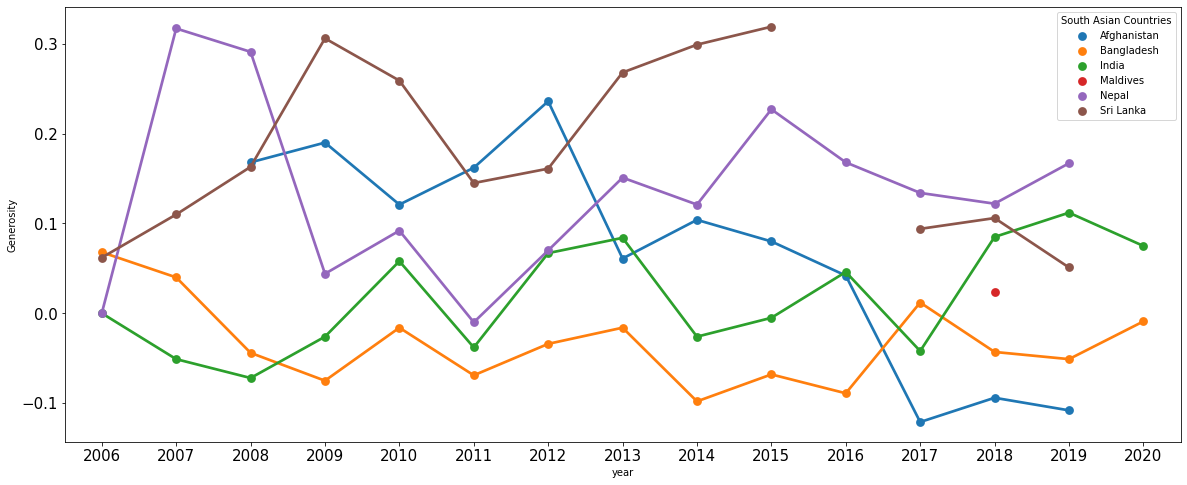

In [35]:
plt.figure(figsize=(20,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(x='year',y='Generosity',hue='South Asian Countries',data=south_asia)

According to data , Afganisthan is the worst place to live in.